# Extremes - Demo

In [88]:
import autoroot
import xarray as xr
from geo_toolz._src.masks.country import add_country_mask
from geo_toolz._src.masks.land import add_land_mask
from geo_toolz._src.masks.ocean import add_ocean_mask
from geo_toolz._src.validation.coords import validate_longitude, validate_latitude

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
!ls "/pool/datos/reanalisis/era5/hourly/europe/025"

t2m


In [93]:
data_dir = '/pool/datos/reanalisis/era5/hourly/europe/025/t2m/*.nc'

In [94]:
def preprocess(ds):
    ds = validate_latitude(ds)
    ds = validate_longitude(ds)
    # ds = ds.sortby(["time", "lon", "lat"])
    return ds

ds = xr.open_mfdataset(
    data_dir, preprocess=preprocess, engine="netcdf4")

In [95]:
ds

<xarray.Dataset>
Dimensions:  (lon: 301, lat: 181, time: 639912, expver: 2)
Coordinates:
  * lon      (lon) float32 -25.0 -24.75 -24.5 -24.25 ... 49.25 49.5 49.75 50.0
  * lat      (lat) float32 75.0 74.75 74.5 74.25 74.0 ... 30.75 30.5 30.25 30.0
  * time     (time) datetime64[ns] 1950-01-01 ... 2022-12-31T23:00:00
  * expver   (expver) int32 1 5
Data variables:
    t2m      (time, lat, lon, expver) float32 dask.array<chunksize=(8760, 181, 301, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-03 14:44:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

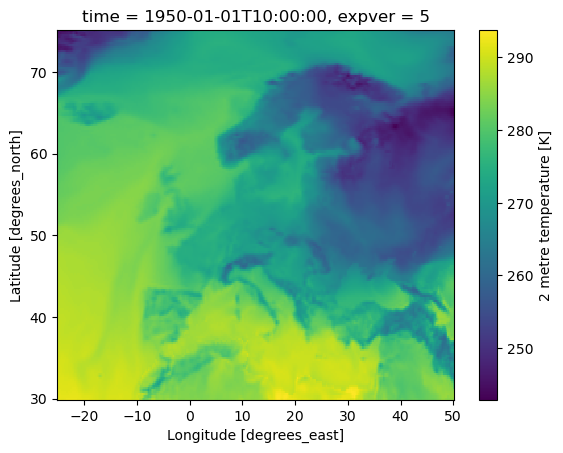

In [56]:
ds.t2m.isel(time=10, expver=1).plot.pcolormesh()

## Country Mask

In [67]:
ds = add_country_mask(ds, country="Spain")

In [68]:
ds

<xarray.Dataset>
Dimensions:     (lon: 301, lat: 181, time: 639912, expver: 2)
Coordinates:
  * lon         (lon) float32 -25.0 -24.75 -24.5 -24.25 ... 49.5 49.75 50.0
  * lat         (lat) float32 75.0 74.75 74.5 74.25 ... 30.75 30.5 30.25 30.0
  * time        (time) datetime64[ns] 1950-01-01 ... 2022-12-31T23:00:00
  * expver      (expver) int32 1 5
    spain_mask  (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Data variables:
    t2m         (time, lat, lon, expver) float32 dask.array<chunksize=(8760, 181, 301, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-03 14:44:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

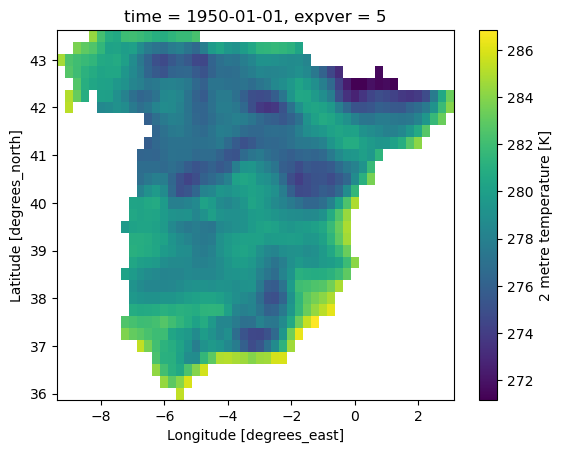

In [71]:
ds.isel(time=0, expver=1).where(ds.spain_mask==1, drop=True).t2m.plot()

### Land Mask

In [114]:
import regionmask

In [115]:
oceans = regionmask.defined_regions.natural_earth_v5_0_0.ocean_basins_50

In [119]:
ds_ = add_ocean_mask(ds)
ds_ = ds_.where(ds_.region_ocean=="North Atlantic Ocean", drop=True)
ds_

<xarray.Dataset>
Dimensions:        (time: 639912, lat: 181, lon: 301, expver: 2, region_ocean: 0)
Coordinates:
  * lon            (lon) float32 -25.0 -24.75 -24.5 -24.25 ... 49.5 49.75 50.0
  * lat            (lat) float32 75.0 74.75 74.5 74.25 ... 30.75 30.5 30.25 30.0
  * time           (time) datetime64[ns] 1950-01-01 ... 2022-12-31T23:00:00
  * expver         (expver) int32 1 5
  * region_ocean   (region_ocean) int64 
    abbrevs_ocean  (region_ocean) <U20 
    names_ocean    (region_ocean) <U20 
Data variables:
    t2m            (time, lat, lon, expver, region_ocean) float32 dask.array<chunksize=(8760, 181, 301, 2, 0), meta=np.ndarray>
    mask           (region_ocean, lat, lon) float64 
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-03 14:44:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [91]:
ds_

<xarray.Dataset>
Dimensions:     (lon: 301, lat: 181, time: 639912, expver: 2, region: 24)
Coordinates:
  * lon         (lon) float32 -25.0 -24.75 -24.5 -24.25 ... 49.5 49.75 50.0
  * lat         (lat) float32 75.0 74.75 74.5 74.25 ... 30.75 30.5 30.25 30.0
  * time        (time) datetime64[ns] 1950-01-01 ... 2022-12-31T23:00:00
  * expver      (expver) int32 1 5
    spain_mask  (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    land_mask   (lat, lon) int16 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 0 0 0 0 0 0
  * region      (region) int64 2 7 19 25 26 31 32 35 ... 75 76 77 78 82 104 105
    abbrevs     (region) <U20 'North Atlantic Ocean' ... 'Aegean Sea'
    names       (region) <U20 'North Atlantic Ocean' ... 'Aegean Sea'
Data variables:
    t2m         (time, lat, lon, expver) float32 dask.array<chunksize=(8760, 181, 301, 2), meta=np.ndarray>
    mask        (region, lat, lon) bool False False False ... False False False
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-03 14:44:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [87]:
mask = oceans.mask_3D(ds)
mask

<xarray.DataArray 'mask' (region: 24, lat: 181, lon: 301)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float32 75.0 74.75 74.5 74.25 74.0 ... 30.75 30.5 30.25 30.0
  * lon      (lon) float32 -25.0 -24.75 -24.5 -24.25 ... 49.25 49.5 49.75 50.0
  * region   (region) int64 2 7 19 25 26 31 32 35 ... 73 75 76 77 78 82 104 105
    abbrevs  (region) <U20 'North Atlantic Ocean' 'Black Sea' ... 'Aegean Sea'
    names    (region) <U20 'North Atlantic Ocean' 'Black Sea' ... 'Aegean Sea'
Attributes:
    standard_name:  region

In [84]:
ocean_110.regions

{0: <regionmask._OneRegion: Arctic Ocean (Arctic Ocean / 0)>,
 1: <regionmask._OneRegion: SOUTHERN OCEAN (SOUTHERN OCEAN / 1)>,
 2: <regionmask._OneRegion: North Atlantic Ocean (North Atlantic Ocean / 2)>,
 3: <regionmask._OneRegion: North Pacific Ocean (North Pacific Ocean / 3)>,
 4: <regionmask._OneRegion: South Pacific Ocean (South Pacific Ocean / 4)>,
 5: <regionmask._OneRegion: INDIAN OCEAN (INDIAN OCEAN / 5)>,
 6: <regionmask._OneRegion: South Atlantic Ocean (South Atlantic Ocean / 6)>,
 7: <regionmask._OneRegion: Black Sea (Black Sea / 7)>,
 8: <regionmask._OneRegion: Philippine Sea (Philippine Sea / 8)>,
 9: <regionmask._OneRegion: Tasman Sea (Tasman Sea / 9)>,
 10: <regionmask._OneRegion: Bay of Bengal (Bay of Bengal / 10)>,
 11: <regionmask._OneRegion: South China Sea (South China Sea / 11)>,
 12: <regionmask._OneRegion: Sea of Japan (Sea of Japan / 12)>,
 13: <regionmask._OneRegion: Arabian Sea (Arabian Sea / 13)>,
 14: <regionmask._OneRegion: Beaufort Sea (Beaufort Sea / 14

In [80]:
land_110

<regionmask.Regions 'Natural Earth: landmask 110m'>
Source:   http://www.naturalearthdata.com
overlap:  False

Regions:
0 lnd land

[1 regions]

In [75]:
ds = add_land_mask(ds)
ds

<xarray.Dataset>
Dimensions:     (lon: 301, lat: 181, time: 639912, expver: 2)
Coordinates:
  * lon         (lon) float32 -25.0 -24.75 -24.5 -24.25 ... 49.5 49.75 50.0
  * lat         (lat) float32 75.0 74.75 74.5 74.25 ... 30.75 30.5 30.25 30.0
  * time        (time) datetime64[ns] 1950-01-01 ... 2022-12-31T23:00:00
  * expver      (expver) int32 1 5
    spain_mask  (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    land_mask   (lat, lon) int16 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 0 0 0 0 0 0
Data variables:
    t2m         (time, lat, lon, expver) float32 dask.array<chunksize=(8760, 181, 301, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-03 14:44:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

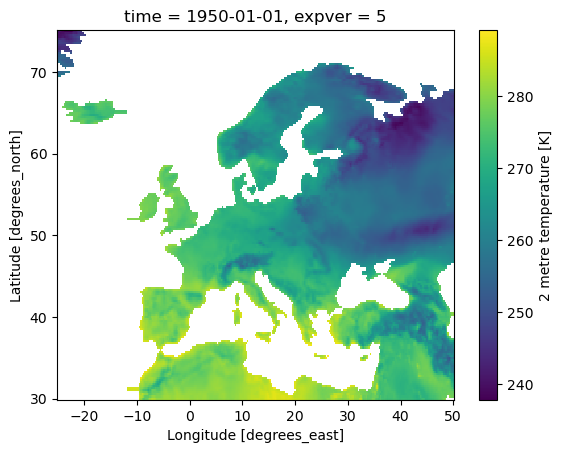

In [76]:
ds.isel(time=0, expver=1).where(ds.land_mask==1, drop=True).t2m.plot()

### Water Mask

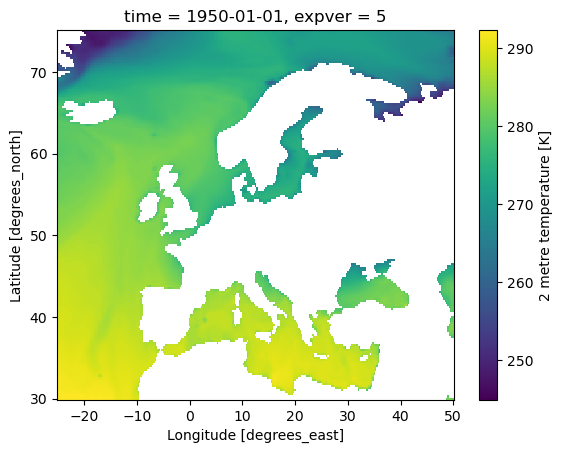

In [77]:
ds.isel(time=0, expver=1).where(ds.land_mask!=1, drop=True).t2m.plot()